In [15]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Analysis of wrong geometry --> graph conversions 

This notebook has the goal to explore whether the conversion from cartesian geometry (contained in the CONTCAR files of VASP) to graph has been carried out correctly. The algorithm that creates the graph representation is based on Voronoi tesselation and implemented in pyRDTP.
NB The outcome of the conversion from geometry to graph strongly depends on the Voronoi tolerance parameter (default=0.25) and the applied atomic radii (default=CORDERO set of atomic radii).

In [4]:
def geometry_to_graph_analysis(dataset: str):
    """
    Check that all adsorption samples in the defined dataset are correctly 
    converted to a graph. The correctness of the graph is defined by the presence 
    of at least one metal atom in the system.
    Args: 
        dataset(str): name of the dataset analyzed. Must be located in "./Data/"" directory.
                      The parsed file is Dataset.dat, which contains the graph representations
                      of each sample in COO format.
    Returns:
        new_list(list): list of lists contains the metal atoms in the graph.  
        wrong_graphs(int): number of badly represented samples, in which no metal atom is present in the 
                           graph representation.
        wrong_samples(list): list of the badly represented data
    """
    atoms = ('C', 'H', 'O', 'N', 'S')
    if dataset[:3] == "gas":
        return "Error: This function is just for datasets containing adsorption systems!"
    with open("./FG_dataset/{}/pre_05_False_15.dat".format(dataset)) as f:
        all_lines = f.readlines()
    dataset_size = int(len(all_lines)/5)
    lines = []
    labels = []
    for i in range(dataset_size):
        lines.append(all_lines[1 + 5*i])  # Read the second line of each graph (ex. "C H C H Ag")
        labels.append(all_lines[5*i])     # Read label of each sample (ex. "ag-4a01-a")
    for i in range(dataset_size):
        lines[i] = lines[i].strip("\n")
        lines[i] = lines[i].split()
        labels[i] = labels[i].strip("\n")
    new_list = [[]] * dataset_size
    wrong_samples = []
    for i in range(dataset_size):
        new_list[i] = [lines[i][j] for j in range(len(lines[i])) if lines[i][j] not in atoms]
        if new_list[i] == []:
            wrong_samples.append(labels[i])
    wrong_graphs = new_list.count([])
    print("Dataset Name: {}".format(dataset))
    print("Dataset Size: {}".format(dataset_size))
    print("Number of badly represented data: {}".format(wrong_graphs))
    print("Percentage of bad representations: {:.2f}%".format((wrong_graphs/dataset_size)*100))
    return new_list, wrong_graphs, wrong_samples, dataset_size, labels

## Analysis of the global dataset for the GNN

In [5]:
all_datasets = ["amides", "amidines", "aromatics", "aromatics2",
                 "carbamate_esters", "group2", "group2b", "group3N",
                 "group3S", "group4", "oximes"]
families = ["Amides", "Amidines", "Aromatics", "Aromatics", 
                   "Carbamates", "$C_{x}H_{y}O_{(0,1)}$", "$C_{x}H_{y}O_{(0,1)}$",
                   "$C_{x}H_{y}N$", "$C_{x}H_{y}S$", "$C_{x}H_{y}O_{(2,3)}$", 
                   "Oximes"]

family_dict = dict(zip(all_datasets, families))

In [6]:
bad_representations = []
bad_items = []
datasets_size = []
dataset_labels = []
for dataset in all_datasets:
    _, wrong_graphs, wrong_samples, tot, labels = geometry_to_graph_analysis(dataset)
    print("----------------------------------------")
    bad_representations.append(wrong_graphs)
    bad_items.append(wrong_samples)
    datasets_size.append(tot)
    dataset_labels.append(labels)

bad_dict = dict(zip(all_datasets, bad_representations))
bad_items_dict = dict(zip(all_datasets, bad_items))
dataset_size_dict = dict(zip(all_datasets, datasets_size))
labels_dict = dict(zip(all_datasets, dataset_labels))
total_bad = sum(bad_representations)
total_datasets = sum(datasets_size)

Dataset Name: amides
Dataset Size: 180
Number of badly represented data: 0
Percentage of bad representations: 0.00%
----------------------------------------
Dataset Name: amidines
Dataset Size: 468
Number of badly represented data: 0
Percentage of bad representations: 0.00%
----------------------------------------
Dataset Name: aromatics
Dataset Size: 312
Number of badly represented data: 49
Percentage of bad representations: 15.71%
----------------------------------------
Dataset Name: aromatics2
Dataset Size: 132
Number of badly represented data: 18
Percentage of bad representations: 13.64%
----------------------------------------
Dataset Name: carbamate_esters
Dataset Size: 180
Number of badly represented data: 1
Percentage of bad representations: 0.56%
----------------------------------------
Dataset Name: group2
Dataset Size: 326
Number of badly represented data: 41
Percentage of bad representations: 12.58%
----------------------------------------
Dataset Name: group2b
Dataset Siz

In [7]:
labels_dict["amidines"]

['zn-4aZm-a',
 'cd-4aZa-a',
 'au-4aZb-a',
 'ir-4aZo-a',
 'pt-4aZ8-a',
 'ir-4aZl-a',
 'ag-26Z3-a',
 'os-4aZ1-a',
 'ag-4aZg-a',
 'pd-38Z4-a',
 'rh-38Z3-a',
 'os-4aZo-a',
 'ni-4aZn-a',
 'os-38Z4-a',
 'pt-38Z3-a',
 'ru-38Z5-a',
 'pd-4aZo-a',
 'pd-4aZa-a',
 'cu-38Z2-a',
 'rh-4aZ6-a',
 'cd-38Z2-a',
 'cu-38Z1-a',
 'ni-26Z4-a',
 'ag-4aZc-a',
 'cu-4aZb-a',
 'ru-4aZc-a',
 'zn-38Z8-a',
 'ag-4aZ7-a',
 'ru-4aZh-a',
 'au-26Z1-a',
 'zn-38Za-a',
 'pd-4aZi-a',
 'pd-4aZ8-a',
 'cu-26Z2-a',
 'ag-4aZf-a',
 'ru-4aZ8-a',
 'ru-26Z2-a',
 'rh-4aZ7-a',
 'ni-26Z1-a',
 'ru-4aZ9-a',
 'rh-38Z6-a',
 'rh-4aZm-a',
 'pt-4aZh-a',
 'ru-4aZg-a',
 'pt-4aZf-a',
 'pd-38Z5-a',
 'zn-4aZ9-a',
 'zn-4aZa-a',
 'au-4aZd-a',
 'cd-14Z1-a',
 'ag-4aZl-a',
 'ir-26Z3-a',
 'au-38Z4-a',
 'au-38Z8-a',
 'cu-4aZe-a',
 'ir-4aZ3-a',
 'ag-38Z9-a',
 'ni-4aZ1-a',
 'os-4aZ6-a',
 'au-4aZ6-a',
 'pt-4aZm-a',
 'pt-4aZ2-a',
 'ni-4aZ5-a',
 'os-4aZe-a',
 'os-14Z1-a',
 'cd-4aZe-a',
 'pd-4aZc-a',
 'cd-4aZh-a',
 'zn-4aZg-a',
 'ru-38Z2-a',
 'au-38Z1-a',
 'pt-4

In [8]:
total_size_family = [0] * (len(set(families)))
for i in range(len(total_size_family)):
    for group in all_datasets:
        if family_dict[group] == list(set(families))[i]:
            total_size_family[i] += dataset_size_dict[group]
            
bad_family = [0] * (len(set(families)))
for i in range(len(bad_family)):
    for group in all_datasets:
        if family_dict[group] == list(set(families))[i]:
            bad_family[i] += bad_dict[group]

In [9]:
bad_family_dict = dict(zip(set(families),bad_family))
total_size_dict = dict(zip(set(families),total_size_family))
families = list(total_size_dict.keys())
bad = list(bad_family_dict.values())
tot = list(total_size_dict.values())

In [10]:
import pandas as pd

In [11]:
df_family = pd.DataFrame(data=dict(zip(["Family", "Bad", "Total"], [families, bad, tot])))

In [12]:
df_family

,Family,Bad,Total
0,"$C_{x}H_{y}O_{(2,3)}$",7,228
1,Oximes,0,144
2,$C_{x}H_{y}N$,0,384
3,Amides,0,180
4,Amidines,0,468
5,"$C_{x}H_{y}O_{(0,1)}$",44,386
6,Carbamates,1,180
7,Aromatics,67,444
8,$C_{x}H_{y}S$,0,228


In [13]:
(total_bad / total_datasets) * 100

4.504163512490537

The output of the cell above represents the percentage of badly represented samples

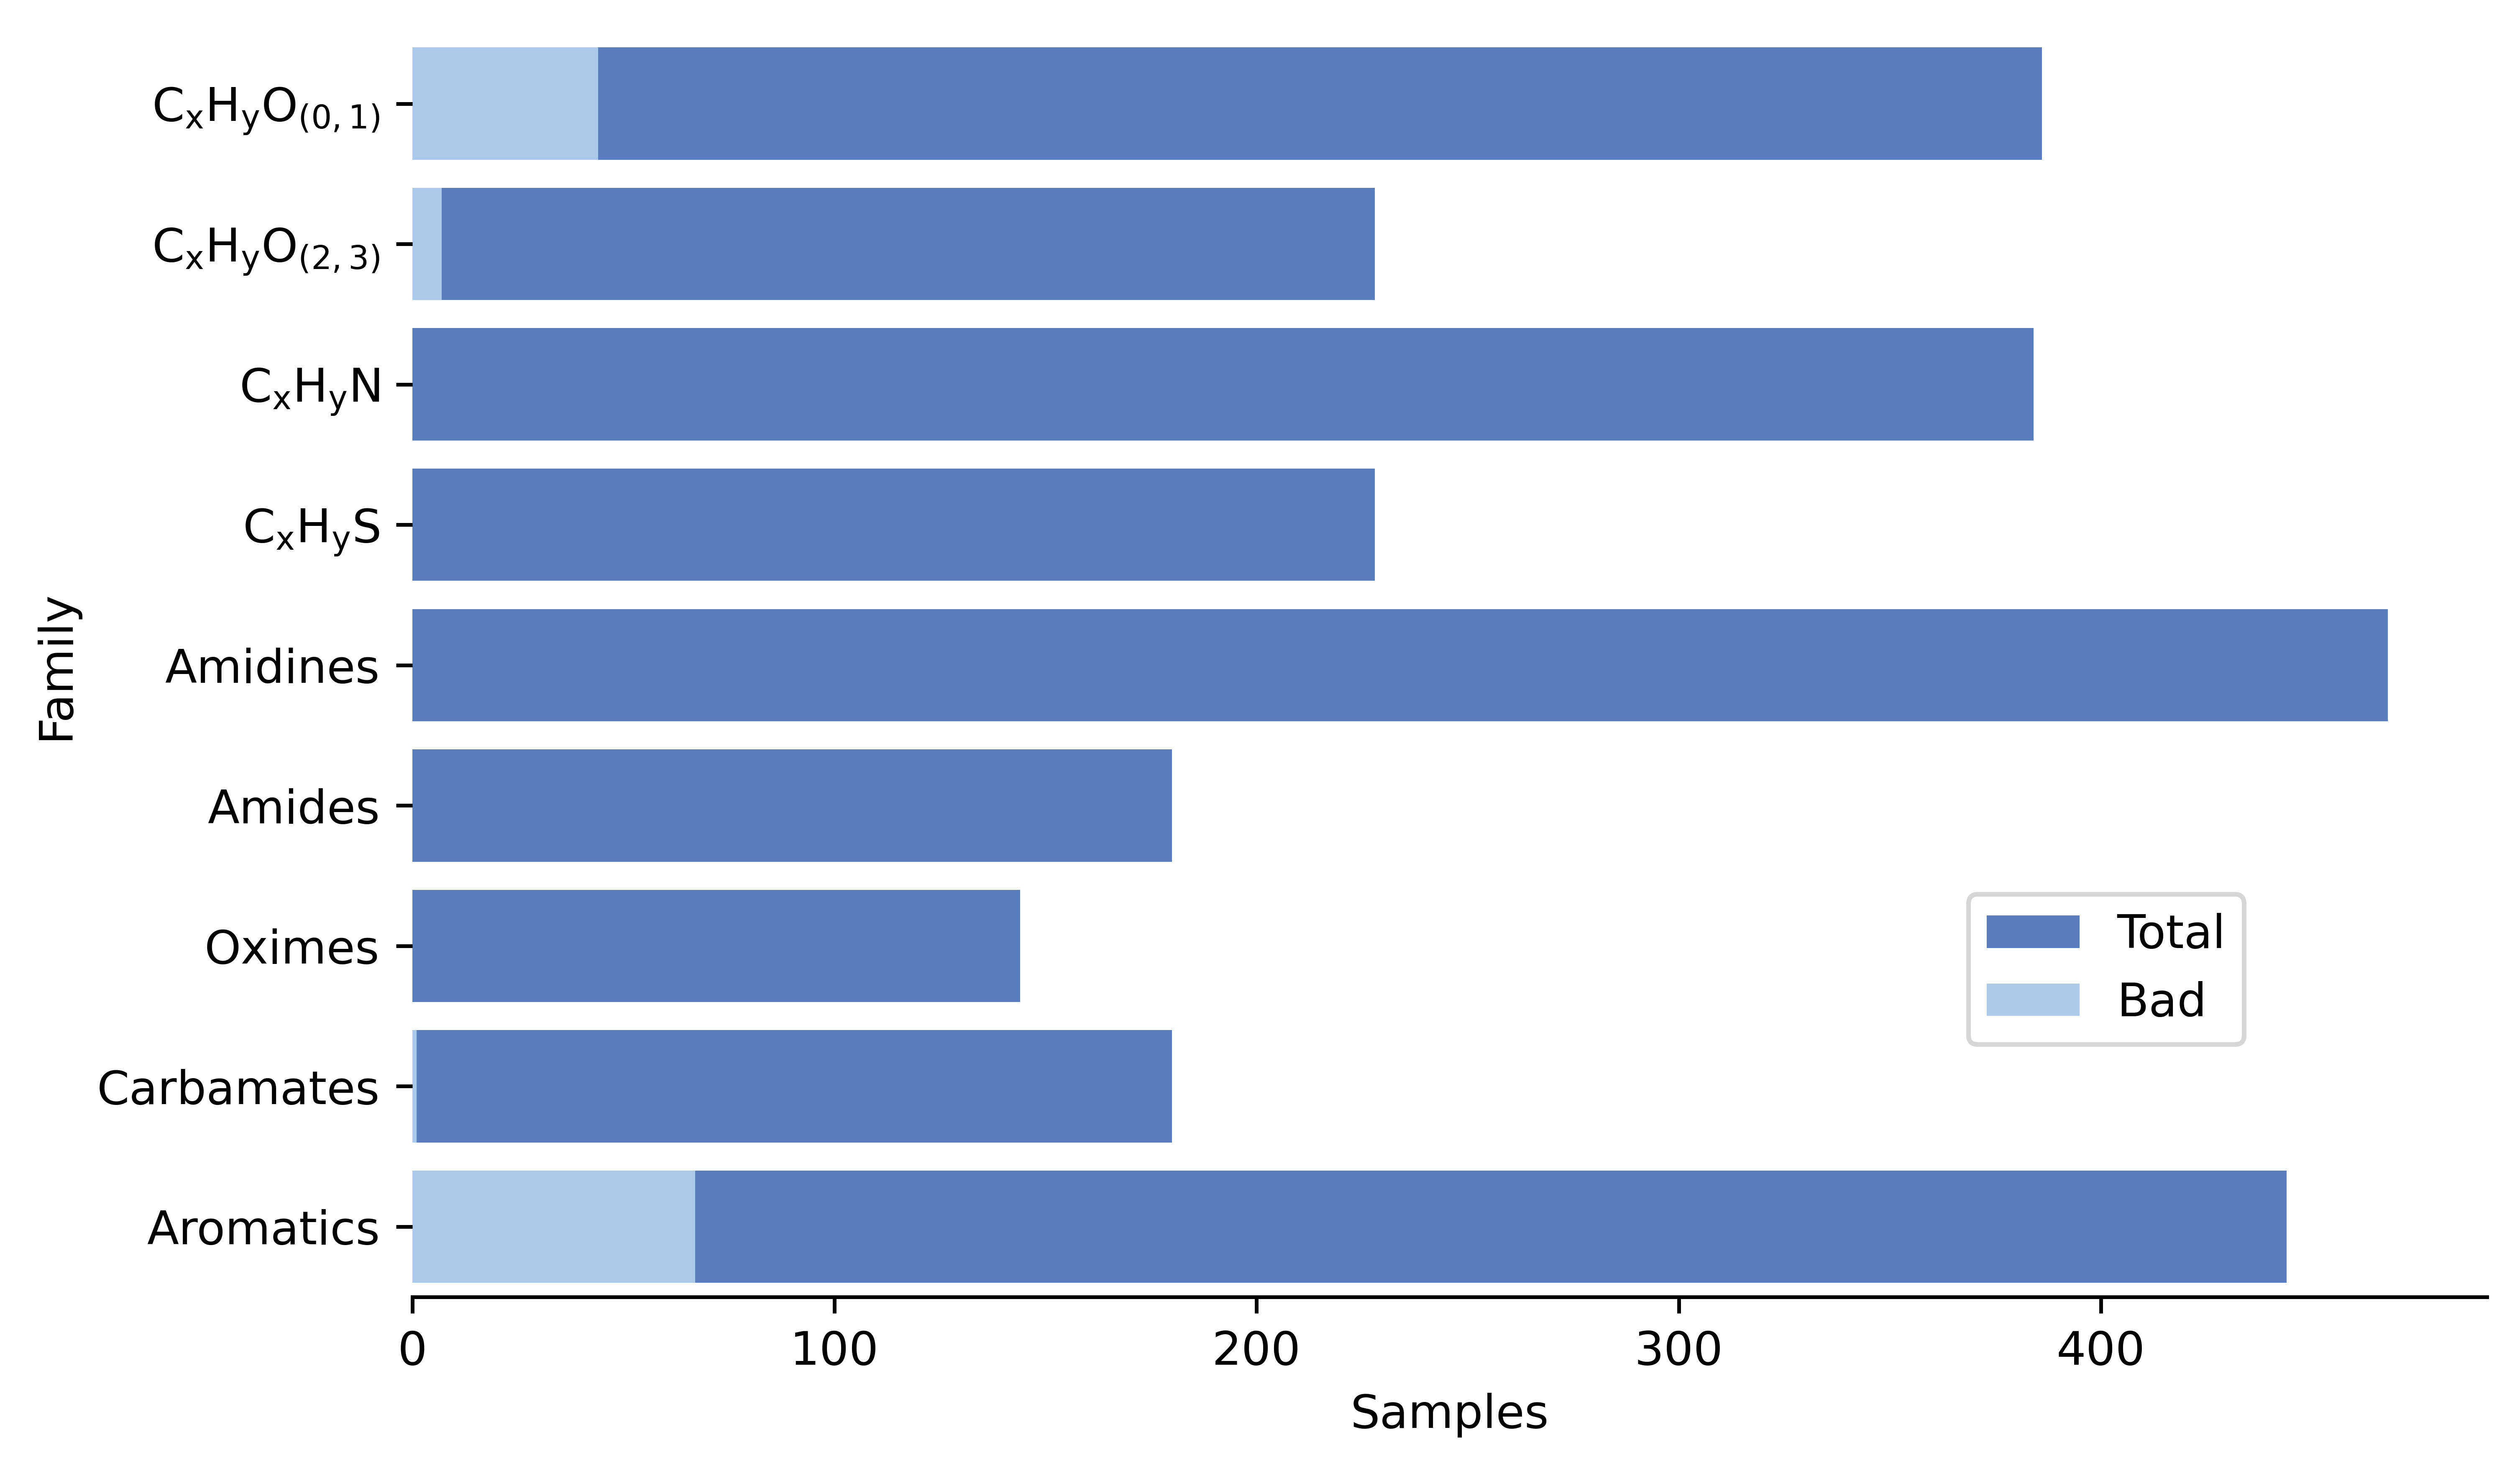

In [16]:

y = np.array(list(bad_family_dict.values()))
y_tot = np.array(list(dataset_size_dict.values()))
order = ["$C_{x}H_{y}O_{(0,1)}$", "$C_{x}H_{y}O_{(2,3)}$", "$C_{x}H_{y}N$", 
         "$C_{x}H_{y}S$", "Amidines", "Amides", 
         "Oximes", "Carbamates", "Aromatics"]
f, ax = plt.subplots(figsize=(8,5), dpi=800)
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
#sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(data=df_family,
            x="Total", 
            y="Family", 
            orient="h", 
            label="Total", 
            color="b", 
            order=order)
sns.set_color_codes('pastel')
sns.barplot(data=df_family,
            x="Bad", 
            y="Family",
            orient="h", 
            label="Bad", 
            color="b", 
            order=order)
ax.legend(ncol=1, loc=(0.75, 0.2), frameon=True)
ax.set(xlabel="Samples", ylabel="Family")
sns.despine(left=True, bottom=False)
plt.savefig("Bad_family.svg")

# Quantitative analysis and distribution of bad representations over metals

Due to different nomenclature convention applied over the datasets not done by myself (Santiago), these sets are treated separately.

## Santiago's datasets

In [17]:
santi_datasets = ['amides', 'amidines', 'aromatics', 'aromatics2', 
                  'carbamate_esters', 'group2', 'group2b', 'group3N',
                  'group3S', 'group4', 'oximes']  # Share same nomenclature convention
santi_metals = ["ag", "au", "cd", "cu", 
                "ir", "ni", "os", "pd",
                "pt", "rh", "ru", "zn"]
bad_counter = np.zeros((len(santi_metals)))
total_counter = np.zeros((len(santi_metals)))
for i in santi_datasets:
    for j in bad_items_dict[i]:
        for k in range(len(santi_metals)):
            if j[:2] == santi_metals[k]:
                bad_counter[k] += 1
            else:
                pass
            
for i in santi_datasets:
    for j in labels_dict[i]:
        for k in range(len(santi_metals)):
            if j[:2] == santi_metals[k]:
                total_counter[k] += 1
            else:
                pass

santi_bad_counter = list(bad_counter)
santi_tot_counter = list(total_counter)
santi_bad_counter = [int(i) for i in santi_bad_counter]
santi_bad_dict = dict(zip(santi_metals, santi_bad_counter))
santi_tot_dict = dict(zip(santi_metals, santi_tot_counter))
print(santi_tot_dict)

{'ag': 220.0, 'au': 220.0, 'cd': 220.0, 'cu': 220.0, 'ir': 220.0, 'ni': 220.0, 'os': 220.0, 'pd': 220.0, 'pt': 220.0, 'rh': 222.0, 'ru': 220.0, 'zn': 220.0}


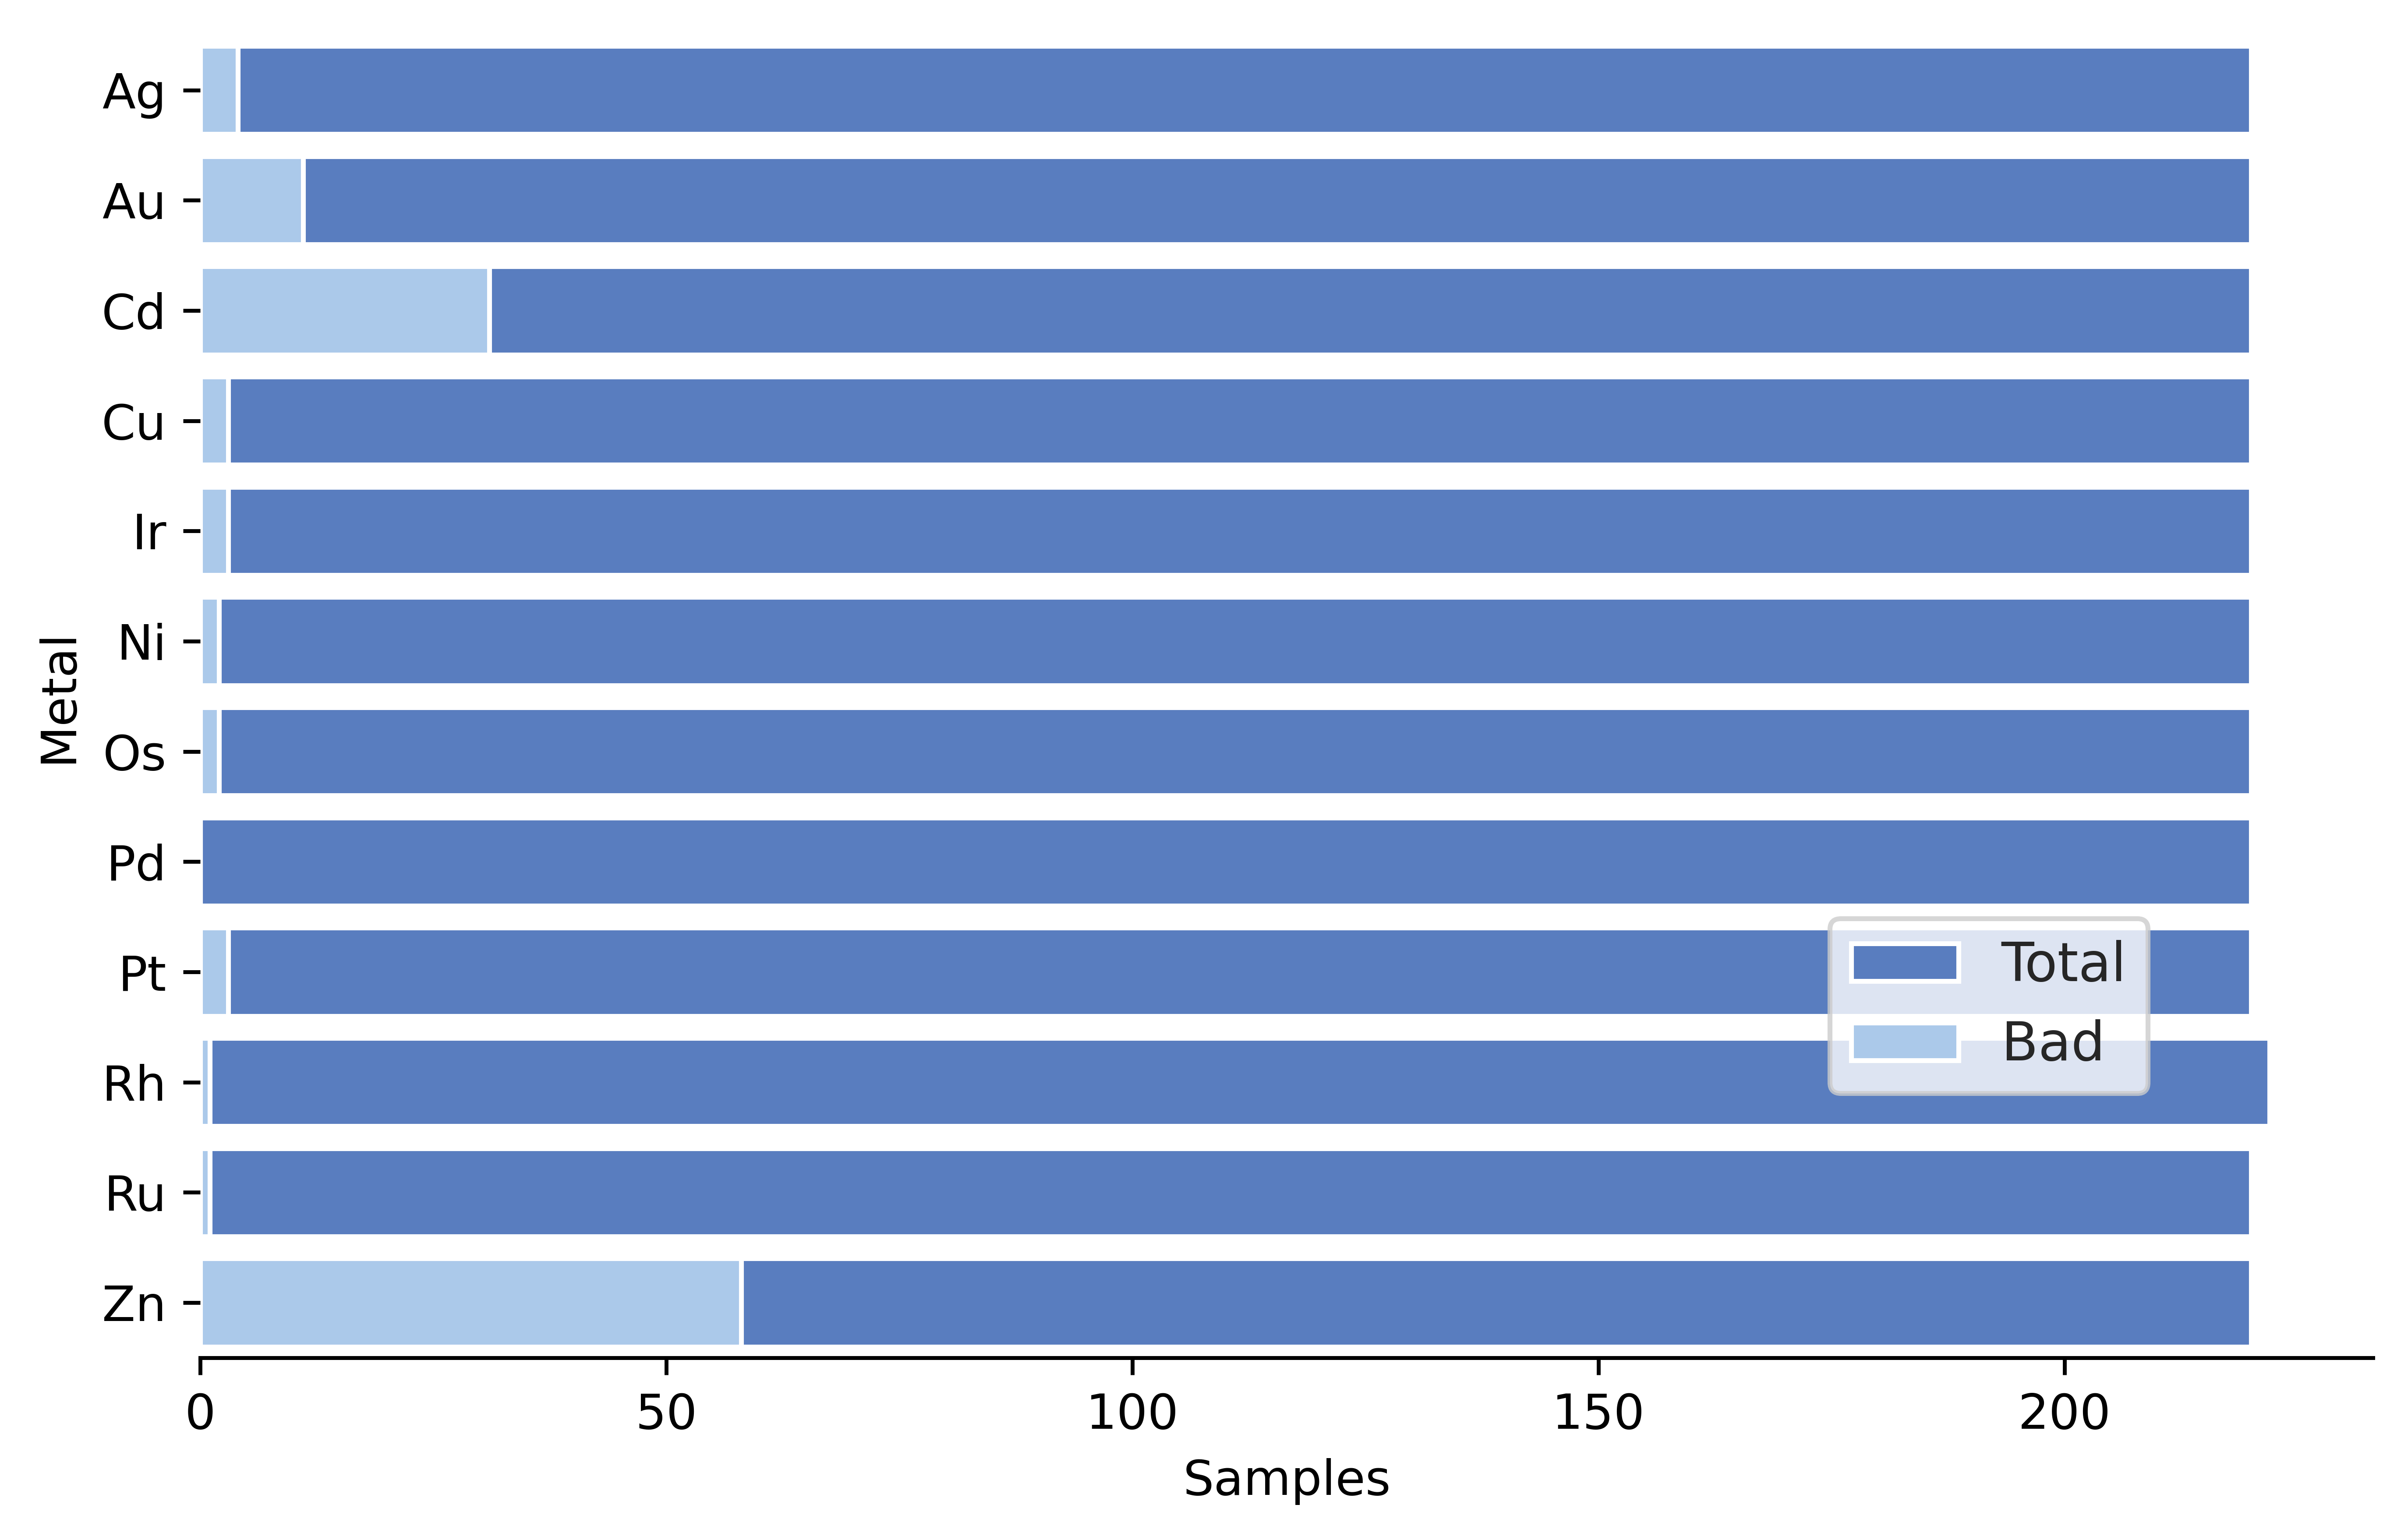

In [18]:
x = santi_metals
y = np.array(santi_bad_counter)
z = np.array(santi_tot_counter)

f, ax = plt.subplots(figsize=(8,5), dpi=800)
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x=z, 
            y=[i.capitalize() for i in x], 
            orient="h", 
            label="Total", 
            color="b")
sns.set_color_codes('pastel')
sns.barplot(x=y, 
            y=[i.capitalize() for i in x], 
            orient="h", 
            label="Bad", 
            color="b")
ax.set(xlabel="Samples", ylabel="Metal")
ax.legend(ncol=1, loc=(0.75, 0.2), frameon=True)

sns.despine(left=True, bottom=False)
plt.savefig("Bad_metal.svg")

## Benson

Set of 54 closed-shell molecules on 4 metals (Ag, Au, Cu, Ni)

In [ ]:
benson = ["Benson"]
benson_metals = ["Ag", "Au", "Cu", "Ni"]
bad_counter = np.zeros((len(benson_metals)))
for i in benson:
    for j in bad_items_dict[i]:
        for k in range(len(benson_metals)):
            if j[:2] == benson_metals[k]:
                bad_counter[k] += 1
            else:
                pass
benson_bad_counter = list(bad_counter)
benson_bad_counter = [int(i) for i in benson_bad_counter]
benson_bad_dict = dict(zip(benson_metals, benson_bad_counter))
print(benson_bad_dict)

In [ ]:
x = benson_metals
y = np.array(benson_bad_counter)

f, ax = plt.subplots(figsize=(7,5), dpi=300)
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x=y, 
            y=x, 
            orient="h", 
            label="Bad", 
            color="b").set_title("Wrong conversions: Benson")
ax.set(xlabel="Sample", ylabel="Metal")
sns.despine(left=True, bottom=True)

## RPCA

Set of no closed-shell intermediates mainly on 12 metals

In [ ]:
rpca = ["RPCA"]
pca_metals = ["Ag", "Au", "Cd", "Co", "Cu", 
              "Fe", "Ir", "Ni", "Os", "Pd",
              "Pt", "Rh", "Ru", "Zn"]
bad_counter = np.zeros((len(pca_metals)))
for i in rpca:
    for j in bad_items_dict[i]:
        for k in range(len(pca_metals)):
            if j[:2] == pca_metals[k]:
                bad_counter[k] +=1
            else:
                pass
pca_bad_counter = list(bad_counter)
pca_bad_counter = [int(i) for i in pca_bad_counter]
pca_bad_dict = dict(zip(pca_metals, pca_bad_counter))
print(pca_bad_dict)

In [ ]:
x = pca_metals
y = np.array(pca_bad_counter)

f, ax = plt.subplots(figsize=(7,5), dpi=300)
sns.set_theme(style="whitegrid")
sns.set_color_codes('muted')
sns.barplot(x=y, 
            y=x, 
            orient="h", 
            label="Bad", 
            color="b").set_title("Wrong conversions: PCA dataset")
ax.set(xlabel="Sample", ylabel="Metal")
sns.despine(left=True, bottom=True)

## Intermediates 

This dataset contains samples only on copper (Cu) surfaces, so no need to analyze distribution over metals.

## Alloys 

No consistent nomenclature convention --> not possible to directly analyze distribution over metals